In [54]:

import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

# 1. Import file

In [55]:
df = pd.read_csv(r"C:\Users\User\Desktop\Nida\dads5001\public_150k_plus_230101.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int64  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968517 non-null  object 
 6   BorrowerCity                 968519 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               930864 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int64  
 12  SBAGuarantyPercentage        968531 non-null  int64  
 13 

# 2. Wrangler,Cleansing Data

In [56]:
# ใน column มี ชื่อเหมือนกัน เช่น NEW YORK , NEW YORK
df['BorrowerCity'].str.upper()

0                   SUMTER
1         NORTH CHARLESTON
2                  SEATTLE
3           SAN BERNARDINO
4                      NaN
                ...       
968526              CASPER
968527         GREEN RIVER
968528               ROZET
968529            SHERIDAN
968530       TETON VILLAGE
Name: BorrowerCity, Length: 968531, dtype: object

In [57]:
# change datatype of date to datetime 
df['DateApproved'] = pd.to_datetime(df['DateApproved'])

# check the format column
df.head(10)['DateApproved']

0   2020-05-01
1   2020-05-01
2   2020-05-01
3   2020-05-01
4   2020-05-01
5   2020-05-01
6   2020-05-01
7   2020-05-01
8   2020-05-01
9   2020-05-01
Name: DateApproved, dtype: datetime64[ns]

In [58]:
#find NaN in data
df.isna().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  37667
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  47
FranchiseName                  933126
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

2.1 drop column have NaN more than 80%

In [60]:
# drop column have NaN more than 80%
df = df.drop(['FranchiseName','NonProfit','UTILITIES_PROCEED','MORTGAGE_INTEREST_PROCEED','RENT_PROCEED','REFINANCE_EIDL_PROCEED','HEALTH_CARE_PROCEED','DEBT_INTEREST_PROCEED','NonProfit','SBAGuarantyPercentage','UndisbursedAmount'],axis=1)

In [61]:
df.isnull().sum()

LoanNumber                         0
DateApproved                       0
SBAOfficeCode                      0
ProcessingMethod                   0
BorrowerName                       4
BorrowerAddress                   14
BorrowerCity                      12
BorrowerState                     13
BorrowerZip                       13
LoanStatusDate                 37667
LoanStatus                         0
Term                               0
InitialApprovalAmount              0
CurrentApprovalAmount              0
ServicingLenderLocationID          0
ServicingLenderName                0
ServicingLenderAddress             0
ServicingLenderCity                0
ServicingLenderState               0
ServicingLenderZip                 0
RuralUrbanIndicator                0
HubzoneIndicator                   0
LMIIndicator                       0
BusinessAgeDescription             1
ProjectCity                       13
ProjectCountyName                 57
ProjectState                       9
P

In [62]:
df = df.dropna()

In [65]:
df.isna().sum()

LoanNumber                     0
DateApproved                   0
SBAOfficeCode                  0
ProcessingMethod               0
BorrowerName                   0
BorrowerAddress                0
BorrowerCity                   0
BorrowerState                  0
BorrowerZip                    0
LoanStatusDate                 0
LoanStatus                     0
Term                           0
InitialApprovalAmount          0
CurrentApprovalAmount          0
ServicingLenderLocationID      0
ServicingLenderName            0
ServicingLenderAddress         0
ServicingLenderCity            0
ServicingLenderState           0
ServicingLenderZip             0
RuralUrbanIndicator            0
HubzoneIndicator               0
LMIIndicator                   0
BusinessAgeDescription         0
ProjectCity                    0
ProjectCountyName              0
ProjectState                   0
ProjectZip                     0
CD                             0
JobsReported                   0
NAICSCode 

In [66]:
pd.options.display.float_format = "{:,.2f}".format
df.describe()[['InitialApprovalAmount','CurrentApprovalAmount']]

,InitialApprovalAmount,CurrentApprovalAmount
count,"916,775.00","916,775.00"
mean,"530,599.90","528,927.11"
std,"734,827.56","728,609.71"
min,0.00,"150,000.00"
25%,"200,643.21","200,800.00"
50%,"296,035.00","295,842.00"
75%,"541,683.00","540,514.25"
max,"10,000,000.00","10,000,000.00"


<AxesSubplot: >

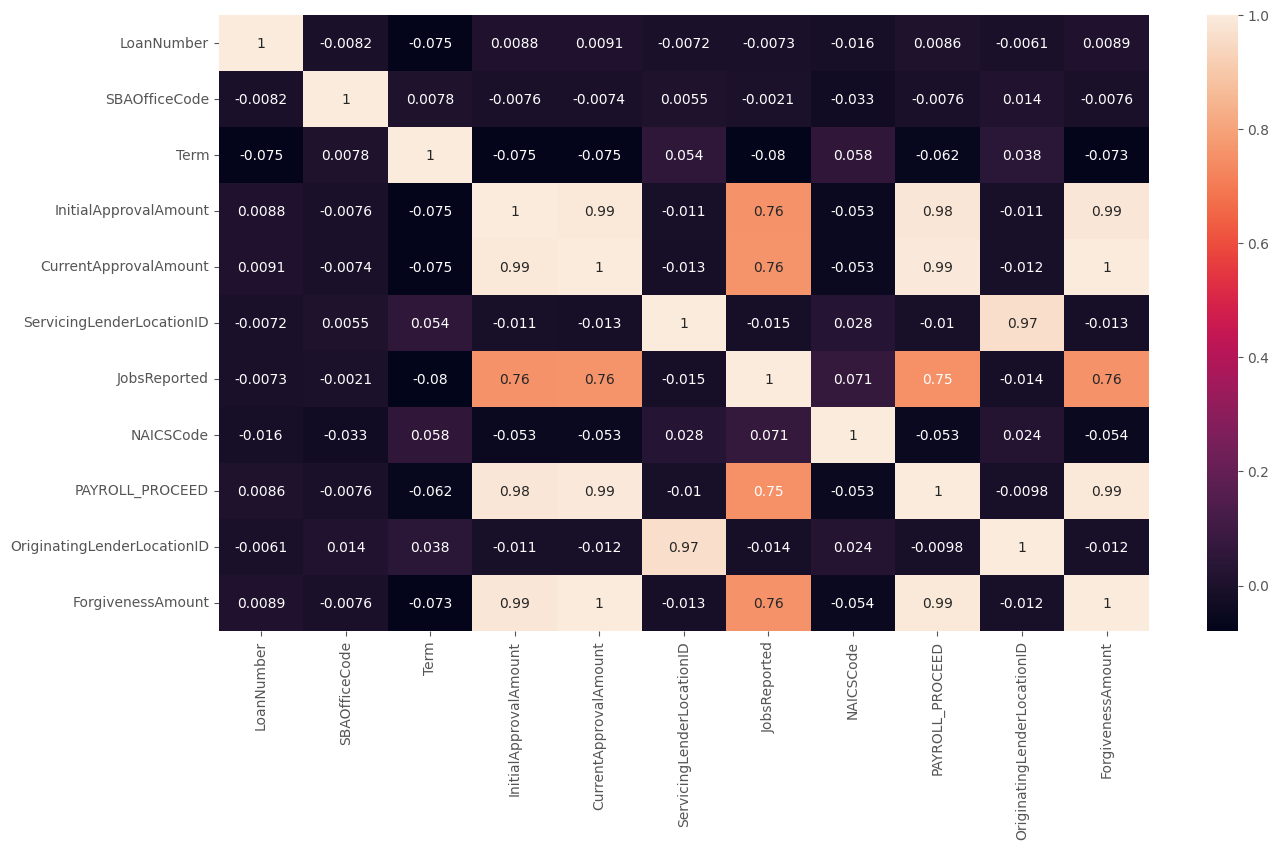

In [67]:
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True)

In [68]:
#change scientific notation to decimal 2 number
pd.options.display.float_format = "{:,.2f}".format
aggegate_ini = df['InitialApprovalAmount'].agg(['mean','count','max','min'])
aggegate_cur = df['CurrentApprovalAmount'].agg(['mean','count','max','min'])

print(aggegate_ini)

print("\n--------------------------------------------\n")

print(aggegate_cur)

mean       530,599.90
count      916,775.00
max     10,000,000.00
min              0.00
Name: InitialApprovalAmount, dtype: float64

--------------------------------------------

mean       528,927.11
count      916,775.00
max     10,000,000.00
min        150,000.00
Name: CurrentApprovalAmount, dtype: float64


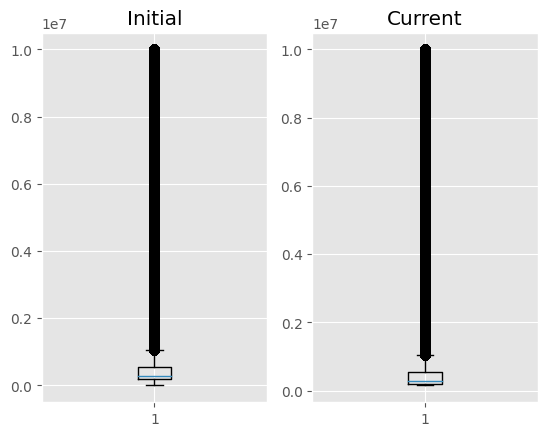

In [69]:
#boxplox looking for outliner
plt.subplot(1,2,1)
plt.boxplot(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df['CurrentApprovalAmount'])
plt.title('Current')
plt.show()

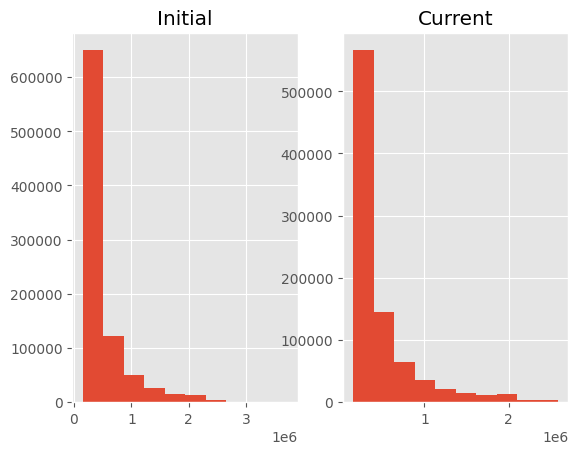

In [77]:
plt.subplot(1,2,1)
plt.hist(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.hist(df['CurrentApprovalAmount'])
plt.title('Current')

plt.show()

In [78]:
#remove outliner
def filter_outliner(df, column_name):
    q_low = df[column_name].quantile(0.01)
    q_hi  = df[column_name].quantile(0.99)
    df_filtered = df[(df[column_name] < q_hi) & (df[column_name] > q_low)]
    return df_filtered

df = filter_outliner(df,'InitialApprovalAmount')
df = filter_outliner(df,'CurrentApprovalAmount')

In [81]:
df.describe()[['InitialApprovalAmount','CurrentApprovalAmount']]

,InitialApprovalAmount,CurrentApprovalAmount
count,"844,630.00","844,630.00"
mean,"430,482.61","429,506.92"
std,"342,300.16","341,178.62"
min,"153,580.00","155,201.17"
25%,"206,162.94","205,885.00"
50%,"296,297.50","295,767.25"
75%,"509,115.75","508,013.25"
max,"2,063,980.00","1,949,990.00"


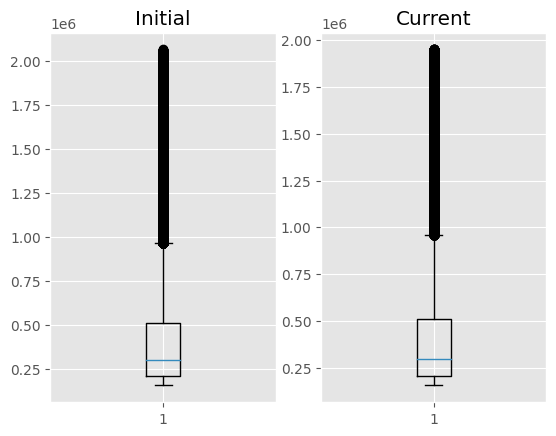

In [79]:
#boxplox looking for remove outliner
plt.subplot(1,2,1)
plt.boxplot(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df['CurrentApprovalAmount'])
plt.title('Current')
plt.show()

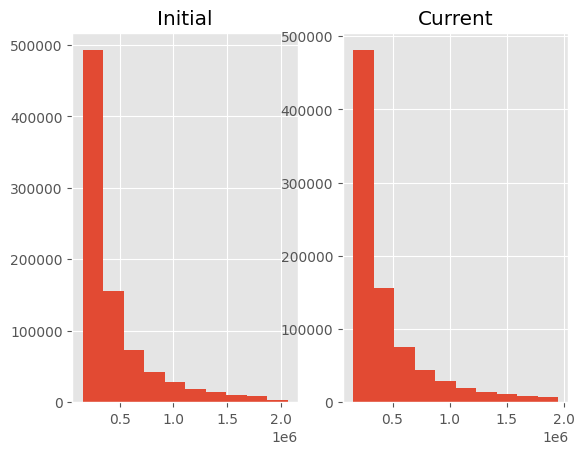

In [80]:
plt.subplot(1,2,1)
plt.hist(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.hist(df['CurrentApprovalAmount'])
plt.title('Current')

plt.show()

## Top 10 ของเมืองที่กู้เงินมากที่สุด


Text(0.5, 1.0, 'Top 10 State for PPP and PPE')

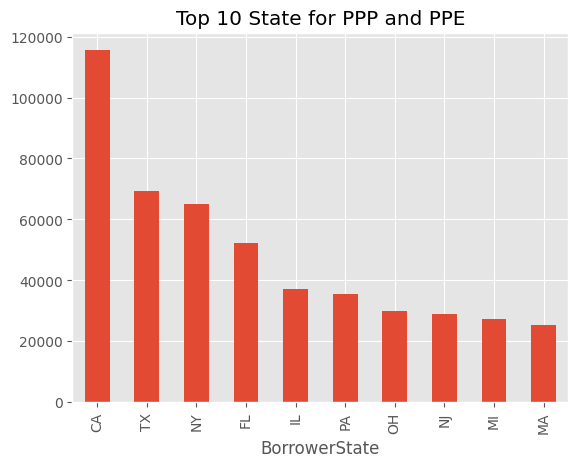

In [75]:
counts = df.value_counts('BorrowerState')
ax = counts.iloc[:10].plot(kind="bar")

plt.title("Top 10 State for PPP and PPE")


สรุปได้ว่าที่เมือง CA = California มีจำนวนบริษัท ที่ใช้ บริการ PPE มากที่สุด

# Q1 : ค่าเฉลี่ยของเงินที่ยืมไปในแต่ละพื้นที่ว่าในแต่ละรัฐ รัฐไหนยืมมากที่สุดเรียงตามลำดับ

<AxesSubplot: xlabel='BorrowerState'>

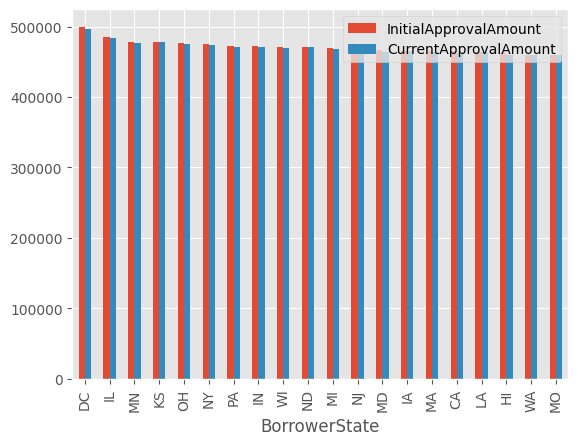

In [76]:
q1 = df.groupby("BorrowerState")['InitialApprovalAmount','CurrentApprovalAmount'].apply(lambda x : x.mean()).sort_values(by = ["InitialApprovalAmount",'CurrentApprovalAmount'],ascending=False)

q1.iloc[:20].plot(kind = "bar")
    

จาก กราฟ สรุปได้ว่า